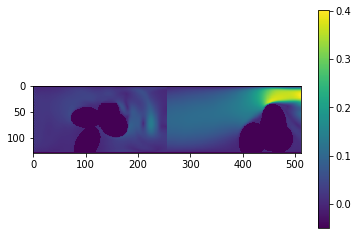

In [28]:
import matplotlib.pyplot as plt
import os
from os.path import isfile
import h5py
import numpy as np

shape = [128, 256]

# open the file
# v = 0.02
path="/home/changgeonlee/mechsys/tflbm/data/fluid_flow_128x128/sample_0/fluid_flow_0050.h5"
dataH5_0 = h5py.File(path,'r')

# v = 0.1
path="/home/changgeonlee/mechsys/tflbm/data/fluid_flow_128x128/sample_5/fluid_flow_0050.h5"
dataH5_1 = h5py.File(path,'r')

# get the keys
key_list_0 = dataH5_0.keys()
key_list_1 = dataH5_1.keys()

flow_0 = np.array(dataH5_0['Velocity_0'][:])
flow_0 = flow_0.reshape([shape[0], shape[1]+128, 3])[0:shape[0],0:shape[1],0:2]

flow_1 = np.array(dataH5_1['Velocity_0'][:])
flow_1 = flow_1.reshape([shape[0], shape[1]+128, 3])[0:shape[0],0:shape[1],0:2]

boundary_0 = np.array(dataH5_0['Gamma'][:])
boundary_0 = boundary_0.reshape([shape[0], shape[1]+128, 1])[0:shape[0],0:shape[1],:]
boundary_0 = boundary_0.reshape([1, shape[0], shape[1], 1])

boundary_1 = np.array(dataH5_1['Gamma'][:])
boundary_1 = boundary_1.reshape([shape[0], shape[1]+128, 1])[0:shape[0],0:shape[1],:]
boundary_1 = boundary_1.reshape([1, shape[0], shape[1], 1])

sflow_plot = np.concatenate([flow_0,flow_1], axis=1)
boundary_concat = np.concatenate([boundary_0,boundary_1], axis=2)

sflow_plot = np.sqrt(np.square(sflow_plot[:,:,0]) + np.square(sflow_plot[:,:,1])) - .05 *boundary_concat[0,:,:,0]

plt.imshow(sflow_plot)
plt.colorbar()
plt.show()